In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn as sk
import os
from os import listdir
from os.path import isfile, join
import datetime
from statsmodels.graphics.tsaplots import plot_pacf
import numpy
from scipy.stats import median_absolute_deviation
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
# removes unwanted Unnamed Columns from Datasets
def clear_df(df):
    drops = [i for i in df.columns if ':' in i]
    drops
    for drop in drops:
        df = df.drop(drop, axis = 1)
    
    return df

In [3]:
def modification_date(filename):
    t = os.path.getmtime(filename)
    return datetime.datetime.fromtimestamp(t)

In [4]:
#change mypath below to your local specifications. Download updated NOPE csvs on nopechart.com, add them to your folder
# and run this method using your most recent dataset
def update_nope(df):
    mypath = ""
    onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
    most_recent = pd.to_datetime(df.iloc[-1][0]) + datetime.timedelta(days = 1)
    for file in onlyfiles:
        if 'csv' in file:
            if not modification_date(r'{}\{}'.format(mypath, file)) < most_recent:
                new_df = pd.read_csv(r'{}\{}'.format(mypath, file))
                new_df = new_df.drop('Timestamp', axis = 1)
                df = df.append(new_df)
    df['Human Time'] = pd.to_datetime(df['Human Time'])
    df.to_csv(r'Data/Production_Data.csv'.format(mypath))
    return df

In [6]:
nope = clear_df(pd.read_csv('Data/Production_Data.csv'))
nope


,Human Time,Call Net Delta * Volume,Put Net Delta * Volume,Stock Volume,NOPE,Stock Price,Symbol
0,2020-01-02 09:35:00,2.110907e+04,-8.794539e+03,3307936.0,37.227223,323.680,SPY
1,2020-01-02 09:40:00,3.988602e+04,-1.835444e+04,3934902.0,54.719476,323.850,SPY
2,2020-01-02 09:45:00,5.470157e+04,-2.709810e+04,4618390.0,59.768610,323.860,SPY
3,2020-01-02 09:50:00,6.183071e+04,-3.748972e+04,5383297.0,45.215765,323.750,SPY
4,2020-01-02 09:55:00,6.992502e+04,-4.824579e+04,5903828.0,36.720632,323.620,SPY
...,...,...,...,...,...,...,...
40044,2021-03-19 15:55:00,7.694226e+07,-6.411183e+07,86464638.0,14.838927,390.565,SPY
40045,2021-03-19 15:56:00,7.182495e+07,-6.875097e+07,87490119.0,3.513526,390.335,SPY
40046,2021-03-19 15:57:00,6.920080e+07,-7.155226e+07,88102119.0,-2.669024,390.215,SPY
40047,2021-03-19 15:58:00,7.155269e+07,-6.986872e+07,89427467.0,1.883058,390.145,SPY


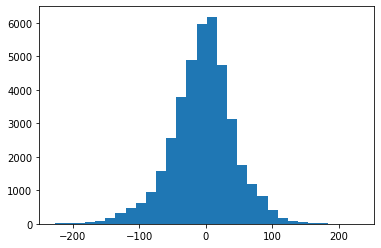

In [7]:
plt.hist(nope.NOPE, bins=30)
plt.show()

In [28]:
# returns
nope['simple_return'] = nope['Stock Price']/nope['Stock Price'].shift(1) - 1
nope['simple_return_pct'] = nope['Stock Price'].pct_change(1)

nope['log_returns'] = np.log(nope['Stock Price']/nope['Stock Price'].shift(1))

nope['cumulative_return'] = np.cumsum(nope['simple_return'])
nope['cumultative_return_compounded'] = (1 + nope['simple_return']).cumprod()

nope['exp_weighted_nope'] = nope['NOPE'].ewm(alpha=.95)
nope['rolling_median'] = nope['NOPE'].rolling(window=30).median()

In [14]:
nope['rolling_median'] = nope['NOPE'].rolling(window=30).median()

In [16]:
nope.iloc[30:50]

,Human Time,Call Net Delta * Volume,Put Net Delta * Volume,Stock Volume,NOPE,Stock Price,Symbol,simple_return,simple_return_pct,log_returns,cumulative_return,cumultative_return_compounded,rolling_median
30,2020-01-02 12:05:00,224516.4637,-207172.7091,17542782.0,9.886547,323.0600,SPY,0.000031,0.000031,0.000031,-0.001912,0.998085,13.079148
31,2020-01-02 12:10:00,230444.2667,-206329.4409,17747751.0,13.587539,323.1300,SPY,0.000217,0.000217,0.000217,-0.001696,0.998301,13.079148
32,2020-01-02 12:15:00,228349.1305,-210982.4195,18089961.0,9.600193,323.0700,SPY,-0.000186,-0.000186,-0.000186,-0.001881,0.998115,12.190341
33,2020-01-02 12:20:00,238193.1937,-209760.2277,18383904.0,15.466228,323.2250,SPY,0.000480,0.000480,0.000480,-0.001402,0.998594,12.190341
34,2020-01-02 12:25:00,239785.7624,-214106.3277,18592069.0,13.812037,323.2250,SPY,0.000000,0.000000,0.000000,-0.001402,0.998594,12.190341
35,2020-01-02 12:30:00,237668.4985,-218657.6711,18831347.0,10.095309,323.1500,SPY,-0.000232,-0.000232,-0.000232,-0.001634,0.998363,10.808836
36,2020-01-02 12:35:00,240484.7792,-222091.7714,19103418.0,9.628124,323.1800,SPY,0.000093,0.000093,0.000093,-0.001541,0.998455,9.990928
37,2020-01-02 12:40:00,253165.0212,-216925.0544,19377487.0,18.702098,323.3400,SPY,0.000495,0.000495,0.000495,-0.001046,0.998950,9.990928
38,2020-01-02 12:45:00,259331.4147,-219171.7148,19738881.0,20.345479,323.3700,SPY,0.000093,0.000093,0.000093,-0.000953,0.999042,9.990928
39,2020-01-02 12:50:00,258696.6045,-225264.4705,19913466.0,16.788707,323.3300,SPY,-0.000124,-0.000124,-0.000124,-0.001077,0.998919,10.808836


In [21]:
nope['median_absolute_deviation'] = ((nope['NOPE'].rolling(window=30).median()-nope['NOPE']).abs()).rolling(window=30).median()

In [22]:
nope.head()

,Human Time,Call Net Delta * Volume,Put Net Delta * Volume,Stock Volume,NOPE,Stock Price,Symbol,simple_return,simple_return_pct,log_returns,cumulative_return,cumultative_return_compounded,rolling_median,median_absolute_deviation
0,2020-01-02 09:35:00,21109.0665,-8794.5394,3307936.0,37.227223,323.68,SPY,NaN,NaN,NaN,NaN,NaN,"Rolling [window=30,center=False,axis=0]",NaN
1,2020-01-02 09:40:00,39886.0152,-18354.4376,3934902.0,54.719476,323.85,SPY,0.000525,0.000525,0.000525,0.000525,1.000525,"Rolling [window=30,center=False,axis=0]",NaN
2,2020-01-02 09:45:00,54701.5718,-27098.0969,4618390.0,59.768610,323.86,SPY,0.000031,0.000031,0.000031,0.000556,1.000556,"Rolling [window=30,center=False,axis=0]",NaN
3,2020-01-02 09:50:00,61830.7123,-37489.7230,5383297.0,45.215765,323.75,SPY,-0.000340,-0.000340,-0.000340,0.000216,1.000216,"Rolling [window=30,center=False,axis=0]",NaN
4,2020-01-02 09:55:00,69925.0235,-48245.7942,5903828.0,36.720632,323.62,SPY,-0.000402,-0.000402,-0.000402,-0.000185,0.999815,"Rolling [window=30,center=False,axis=0]",NaN


In [25]:
nope.tail()

,Human Time,Call Net Delta * Volume,Put Net Delta * Volume,Stock Volume,NOPE,Stock Price,Symbol,simple_return,simple_return_pct,log_returns,cumulative_return,cumultative_return_compounded,rolling_median,median_absolute_deviation
40044,2021-03-19 15:55:00,76942255.8,-64111831.3,86464638.0,14.838927,390.565,SPY,-0.000307,-0.000307,-0.000307,0.249123,1.206639,"Rolling [window=30,center=False,axis=0]",11.052861
40045,2021-03-19 15:56:00,71824953.5,-68750965.8,87490119.0,3.513526,390.335,SPY,-0.000589,-0.000589,-0.000589,0.248534,1.205929,"Rolling [window=30,center=False,axis=0]",11.322924
40046,2021-03-19 15:57:00,69200796.4,-71552263.1,88102119.0,-2.669024,390.215,SPY,-0.000307,-0.000307,-0.000307,0.248227,1.205558,"Rolling [window=30,center=False,axis=0]",12.308871
40047,2021-03-19 15:58:00,71552689.7,-69868718.8,89427467.0,1.883058,390.145,SPY,-0.000179,-0.000179,-0.000179,0.248047,1.205342,"Rolling [window=30,center=False,axis=0]",12.308871
40048,2021-03-19 15:59:00,46224012.1,-76719284.9,92191008.0,-33.078359,389.845,SPY,-0.000769,-0.000769,-0.000769,0.247278,1.204415,"Rolling [window=30,center=False,axis=0]",13.620504


In [26]:
nope['median_absolute_deviation']

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
40044    11.052861
40045    11.322924
40046    12.308871
40047    12.308871
40048    13.620504
Name: median_absolute_deviation, Length: 40049, dtype: float64

In [40]:
nope = nope.fillna(0)

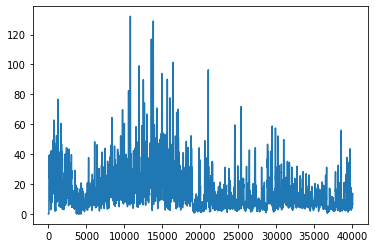

In [41]:
plt.plot(nope['median_absolute_deviation'])

In [42]:
X = nope['NOPE'][:-1]
y = np.array(nope['log_returns'].shift(-1)[:-1])

mod = sm.OLS(X, y)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                   NOPE   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.327
Date:                Mon, 29 Mar 2021   Prob (F-statistic):                       0.249
Time:                        17:16:36   Log-Likelihood:                     -2.1109e+05
No. Observations:               40048   AIC:                                  4.222e+05
Df Residuals:                   40047   BIC:                                  4.222e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [116]:
X = nope['NOPE'][:-5]
y = np.array(nope['log_returns'].shift(-5)[:-5])

mod = sm.OLS(X, y)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                   NOPE   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.3889
Date:                Mon, 29 Mar 2021   Prob (F-statistic):                       0.533
Time:                        17:47:15   Log-Likelihood:                     -2.1107e+05
No. Observations:               40044   AIC:                                  4.221e+05
Df Residuals:                   40043   BIC:                                  4.222e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [43]:
nope['NOPE'][:-1]

0        37.227223
1        54.719476
2        59.768610
3        45.215765
4        36.720632
           ...    
40043    19.289170
40044    14.838927
40045     3.513526
40046    -2.669024
40047     1.883058
Name: NOPE, Length: 40048, dtype: float64

In [44]:
nope['NOPE'][:-1].isna().sum()

0

In [45]:
nope['log_returns'].isna().sum()

0

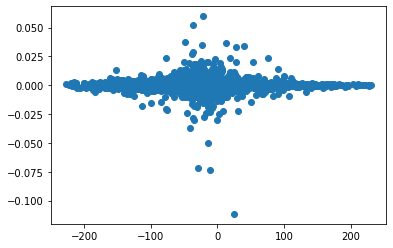

In [46]:
plt.scatter(X, y)

In [47]:
new_nope = clear_df(pd.read_csv('Data/Production_Data.csv'))

In [48]:
new_nope.head()

,Human Time,Call Net Delta * Volume,Put Net Delta * Volume,Stock Volume,NOPE,Stock Price,Symbol
0,2020-01-02 09:35:00,21109.0665,-8794.5394,3307936.0,37.227223,323.68,SPY
1,2020-01-02 09:40:00,39886.0152,-18354.4376,3934902.0,54.719476,323.85,SPY
2,2020-01-02 09:45:00,54701.5718,-27098.0969,4618390.0,59.768610,323.86,SPY
3,2020-01-02 09:50:00,61830.7123,-37489.7230,5383297.0,45.215765,323.75,SPY
4,2020-01-02 09:55:00,69925.0235,-48245.7942,5903828.0,36.720632,323.62,SPY


In [87]:
new_nope['Computer Time'] = pd.to_datetime(new_nope['Human Time'])
new_nope['day'] = pd.to_datetime(new_nope['Computer Time'].dt.date)

In [88]:
new_nope['day']

0       2020-01-02
1       2020-01-02
2       2020-01-02
3       2020-01-02
4       2020-01-02
           ...    
40044   2021-03-19
40045   2021-03-19
40046   2021-03-19
40047   2021-03-19
40048   2021-03-19
Name: day, Length: 40049, dtype: datetime64[ns]

In [92]:
hourly_price = new_nope.resample('H', on='Computer Time')['Stock Price'].ohlc()
hourly_nope = new_nope.resample('H', on='Computer Time')['NOPE'].mean()
hourly = hourly_price.merge(hourly_nope, on = ['Computer Time'])

In [142]:
daily_price = new_nope.resample('D', on='Computer Time')['Stock Price'].ohlc()
daily_nope = new_nope.resample('D', on='Computer Time')['NOPE'].mean()
daily = daily_price.merge(daily_nope, on = ['Computer Time'])

# Let's Look at Hourly

In [107]:
# returns
hourly['simple_return'] = hourly['close']/hourly['close'].shift(1) - 1
hourly['simple_return_pct'] = hourly['close'].pct_change(1)

hourly['log_returns'] = np.log(hourly['close']/hourly['close'].shift(1))

hourly['cumulative_return'] = np.cumsum(hourly['simple_return'])
hourly['cumultative_return_compounded'] = (1 + hourly['simple_return']).cumprod()

hourly['exp_weighted_nope'] = hourly['NOPE'].ewm(alpha=.95).mean()
hourly['rolling_median'] = hourly['NOPE'].rolling(window=30).median()

hourly = hourly.fillna(0)

In [108]:
hourly

,open,high,low,close,NOPE,simple_return,simple_return_pct,log_returns,cumulative_return,cumultative_return_compounded,exp_weighted_nope,rolling_median
Computer Time,,,,,,,,,,,,
2020-01-02 09:00:00,323.680,323.860,323.620,323.6200,46.730341,0.000000,0.000000,0.000000,0.000000,0.000000,46.730341,0.0
2020-01-02 10:00:00,323.870,323.870,322.770,322.9300,16.870265,-0.002132,-0.002132,-0.002134,-0.002132,0.997868,18.292174,0.0
2020-01-02 11:00:00,323.260,323.350,322.730,323.0694,14.169433,0.000432,0.000432,0.000432,-0.001700,0.998299,14.375081,0.0
2020-01-02 12:00:00,323.050,323.370,323.050,323.3550,13.763550,0.000884,0.000884,0.000884,-0.000816,0.999181,13.794123,0.0
2020-01-02 13:00:00,323.360,323.360,323.010,323.0300,4.656043,-0.001005,-0.001005,-0.001006,-0.001822,0.998177,5.112944,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-19 11:00:00,389.885,390.795,388.525,390.5700,9.044904,0.002194,0.002194,0.002192,0.145048,1.131082,7.317077,0.0
2021-03-19 12:00:00,390.605,391.165,390.325,390.9950,39.397924,0.001088,0.001088,0.001088,0.146136,1.132313,37.794072,0.0
2021-03-19 13:00:00,391.015,391.345,390.315,391.1050,39.168408,0.000281,0.000281,0.000281,0.146417,1.132631,39.099692,0.0


In [109]:
X = hourly['NOPE'][:-1]
y = np.array(hourly['log_returns'].shift(-1)[:-1])

mod = sm.OLS(X, y)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                   NOPE   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.633
Date:                Mon, 29 Mar 2021   Prob (F-statistic):                       0.201
Time:                        17:43:16   Log-Likelihood:                         -47781.
No. Observations:               10614   AIC:                                  9.556e+04
Df Residuals:                   10613   BIC:                                  9.557e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [119]:
X = hourly['exp_weighted_nope'][:-1]
y = np.array(hourly['log_returns'].shift(-1)[:-1])

mod = sm.OLS(X, y)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:      exp_weighted_nope   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.000
Method:                 Least Squares   F-statistic:                             0.2852
Date:                Mon, 29 Mar 2021   Prob (F-statistic):                       0.593
Time:                        17:50:00   Log-Likelihood:                         -57264.
No. Observations:               10614   AIC:                                  1.145e+05
Df Residuals:                   10613   BIC:                                  1.145e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [117]:
X = hourly['NOPE'][:-5]
y = np.array(hourly['log_returns'].shift(-5)[:-5])

mod = sm.OLS(X, y)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                   NOPE   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):              0.000
Method:                 Least Squares   F-statistic:                              1.650
Date:                Mon, 29 Mar 2021   Prob (F-statistic):                       0.199
Time:                        17:48:14   Log-Likelihood:                         -47761.
No. Observations:               10610   AIC:                                  9.552e+04
Df Residuals:                   10609   BIC:                                  9.553e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

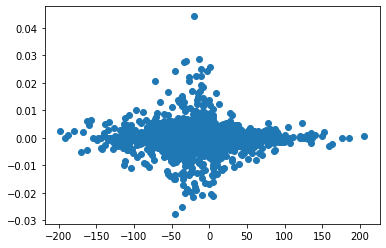

In [110]:
plt.scatter(X, y)

# Daily Returns

In [143]:
# returns
daily['simple_return'] = daily['close']/daily['close'].shift(1) - 1
daily['simple_return_pct'] = daily['close'].pct_change(1)
daily['simple_future_return_pct'] = (daily['close'].pct_change(1)).shift(-1)

daily['log_returns'] = np.log(daily['close']/daily['close'].shift(1))

daily['cumulative_return'] = np.cumsum(daily['simple_return'])
daily['cumultative_return_compounded'] = (1 + daily['simple_return']).cumprod()

daily['exp_weighted_nope'] = daily['NOPE'].ewm(alpha=.95).mean()
daily['rolling_median'] = daily['NOPE'].rolling(window=30).median()

daily = daily.fillna(0)

In [187]:
daily

,open,high,low,close,NOPE,simple_return,simple_return_pct,simple_future_return_pct,log_returns,cumulative_return,cumultative_return_compounded,exp_weighted_nope,rolling_median
Computer Time,,,,,,,,,,,,,
2020-01-02,323.680,324.870,322.730,324.870,23.210972,0.000000,0.000000,-0.007572,0.000000,0.000000,0.000000,23.210972,0.0
2020-01-03,322.625,323.520,322.180,322.410,-4.155240,-0.007572,-0.007572,0.000000,-0.007601,-0.007572,0.992428,-2.852087,0.0
2020-01-04,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.852087,0.0
2020-01-05,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.003815,0.000000,0.000000,0.000000,-2.852087,0.0
2020-01-06,321.120,323.730,321.120,323.640,7.394450,0.000000,0.003815,-0.002812,0.000000,0.000000,0.000000,7.393105,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-15,394.305,396.415,392.225,396.415,31.794549,0.000000,0.005989,-0.000555,0.000000,0.000000,0.000000,31.792713,0.0
2021-03-16,396.865,397.815,395.175,396.195,-8.647650,-0.000555,-0.000555,0.002145,-0.000555,0.144304,1.108722,-6.721677,0.0
2021-03-17,394.225,398.095,393.415,397.045,21.405188,0.002145,0.002145,-0.013575,0.002143,0.146450,1.111101,20.002177,0.0


In [144]:
daily.index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-04', '2020-01-05',
               '2020-01-06', '2020-01-07', '2020-01-08', '2020-01-09',
               '2020-01-10', '2020-01-11',
               ...
               '2021-03-10', '2021-03-11', '2021-03-12', '2021-03-13',
               '2021-03-14', '2021-03-15', '2021-03-16', '2021-03-17',
               '2021-03-18', '2021-03-19'],
              dtype='datetime64[ns]', name='Computer Time', length=443, freq=None)

In [145]:
X = daily['NOPE'][:-1]
y = np.array(daily['log_returns'].shift(-1)[:-1])

mod = sm.OLS(X, y)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                   NOPE   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):              0.005
Method:                 Least Squares   F-statistic:                              3.162
Date:                Mon, 29 Mar 2021   Prob (F-statistic):                      0.0761
Time:                        18:22:29   Log-Likelihood:                         -2147.7
No. Observations:                 442   AIC:                                      4297.
Df Residuals:                     441   BIC:                                      4302.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [146]:
X = daily['exp_weighted_nope'][:-1]
y = np.array(daily['log_returns'].shift(-1)[:-1])

mod = sm.OLS(X, y)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:      exp_weighted_nope   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):              0.002
Method:                 Least Squares   F-statistic:                              1.758
Date:                Mon, 29 Mar 2021   Prob (F-statistic):                       0.186
Time:                        18:22:30   Log-Likelihood:                         -2250.5
No. Observations:                 442   AIC:                                      4503.
Df Residuals:                     441   BIC:                                      4507.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

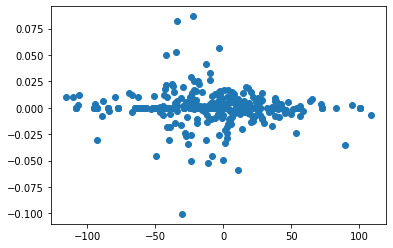

In [147]:
plt.scatter(X, y)

In [148]:
X = daily['NOPE'][:-5]
y = np.array(daily['log_returns'].shift(-5)[:-5])

mod = sm.OLS(X, y)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:                   NOPE   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.002
Method:                 Least Squares   F-statistic:                             0.1932
Date:                Mon, 29 Mar 2021   Prob (F-statistic):                       0.660
Time:                        18:22:31   Log-Likelihood:                         -2130.6
No. Observations:                 438   AIC:                                      4263.
Df Residuals:                     437   BIC:                                      4267.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

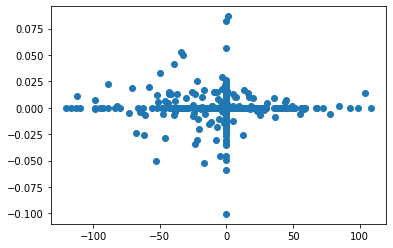

In [149]:
plt.scatter(X, y)

In [150]:
X = hourly['exp_weighted_nope'][:-1]
y = np.array(hourly['log_returns'].shift(-1)[:-1].abs())

mod = sm.OLS(X, y)
res = mod.fit()
print(res.summary())

                                 OLS Regression Results                                
Dep. Variable:      exp_weighted_nope   R-squared (uncentered):                   0.007
Model:                            OLS   Adj. R-squared (uncentered):              0.007
Method:                 Least Squares   F-statistic:                              72.88
Date:                Mon, 29 Mar 2021   Prob (F-statistic):                    1.56e-17
Time:                        18:22:32   Log-Likelihood:                         -57228.
No. Observations:               10614   AIC:                                  1.145e+05
Df Residuals:                   10613   BIC:                                  1.145e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

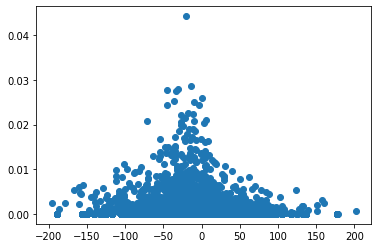

In [151]:
plt.scatter(X,y)

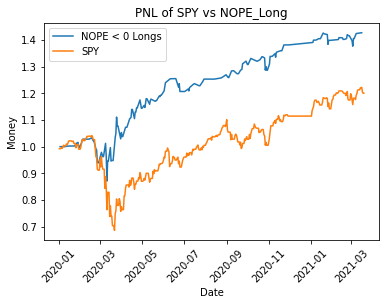

In [166]:
plt.plot((1 + daily[daily['NOPE'] < -0]['simple_future_return_pct']).cumprod(), label="NOPE < 0 Longs")
plt.plot((1 + daily[daily['NOPE'] < 1000]['simple_future_return_pct']).cumprod(), label="SPY")
plt.xticks(rotation=45)
plt.legend()
plt.title("PNL of SPY vs NOPE_Long")
plt.ylabel("Money")
plt.xlabel("Date")
plt.show()

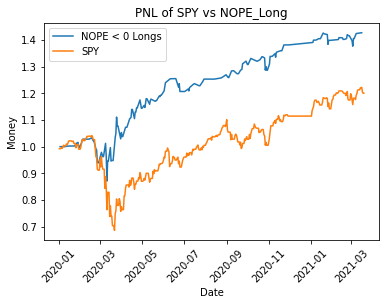

In [171]:
plt.plot((1 + daily[daily['NOPE'] < -0]['simple_future_return_pct'])[:].cumprod(), label="NOPE < 0 Longs")
plt.plot((1 + daily[daily['NOPE'] < 1000]['simple_future_return_pct'])[:].cumprod(), label="SPY")
plt.xticks(rotation=45)
plt.legend()
plt.title("PNL of SPY vs NOPE_Long")
plt.ylabel("Money")
plt.xlabel("Date")
plt.show()

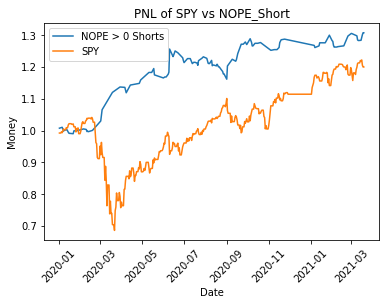

In [178]:
plt.plot(1/(1 + daily[daily['NOPE'] > -0]['simple_future_return_pct'])[:].cumprod(), label="NOPE > 0 Shorts")
plt.plot((1 + daily[daily['NOPE'] < 1000]['simple_future_return_pct'])[:].cumprod(), label="SPY")
plt.xticks(rotation=45)
plt.legend()
plt.title("PNL of SPY vs NOPE_Short")
plt.ylabel("Money")
plt.xlabel("Date")
plt.show()

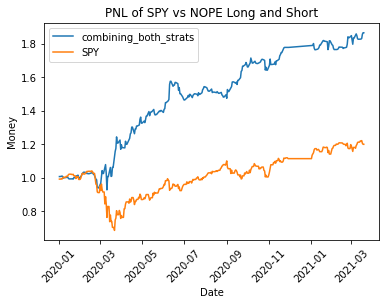

In [186]:
longs = 1 + daily[daily['NOPE'] < -0]['simple_future_return_pct']
shorts = 1/(1 + daily[daily['NOPE'] > -0]['simple_future_return_pct'])
total_pnl = pd.concat([longs,shorts], axis=1, sort=True).sum(axis=1).cumprod()
plt.plot(total_pnl, label= "combining_both_strats")
plt.plot((1 + daily[daily['NOPE'] < 1000]['simple_future_return_pct'])[:].cumprod(), label="SPY")
plt.xticks(rotation=45)
plt.legend()
plt.title("PNL of SPY vs NOPE Long and Short")
plt.ylabel("Money")
plt.xlabel("Date")
plt.show()
            

In [140]:
daily[daily['NOPE'] > -10]['simple_future_return_pct']

Computer Time
2020-01-02   -0.007572
2020-01-03   -1.000000
2020-01-04    0.000000
2020-01-05         inf
2020-01-06   -0.002812
                ...   
2021-03-15   -0.000555
2021-03-16    0.002145
2021-03-17   -0.013575
2021-03-18   -0.004621
2021-03-19    0.000000
Name: simple_future_return_pct, Length: 323, dtype: float64

In [188]:
daily.tail()

,open,high,low,close,NOPE,simple_return,simple_return_pct,simple_future_return_pct,log_returns,cumulative_return,cumultative_return_compounded,exp_weighted_nope,rolling_median
Computer Time,,,,,,,,,,,,,
2021-03-15,394.305,396.415,392.225,396.415,31.794549,0.000000,0.005989,-0.000555,0.000000,0.000000,0.000000,31.792713,0.0
2021-03-16,396.865,397.815,395.175,396.195,-8.647650,-0.000555,-0.000555,0.002145,-0.000555,0.144304,1.108722,-6.721677,0.0
2021-03-17,394.225,398.095,393.415,397.045,21.405188,0.002145,0.002145,-0.013575,0.002143,0.146450,1.111101,20.002177,0.0
2021-03-18,394.845,396.695,390.925,391.655,26.062504,-0.013575,-0.013575,-0.004621,-0.013668,0.132874,1.096017,25.759524,0.0
2021-03-19,389.740,391.435,387.295,389.845,16.397363,-0.004621,-0.004621,0.000000,-0.004632,0.128253,1.090952,16.865468,0.0
